In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib
from community import community_louvain
import seaborn as sns
from termcolor import colored
from networkx.algorithms.community import label_propagation_communities
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
# Đọc file dữ liệu
dt=pd.read_csv("/content/airline.csv", encoding="ISO-8859-1")
dt.dropna()
dt.drop_duplicates()
dt

,Airline,DestinationCountry
0,Air France,United States
1,Air France,Cote d'Ivoire
2,Air France,United States
3,Air France,Nigeria
4,Air France,Nigeria
...,...,...
6135,Virgin Atlantic Airlines,United States
6136,Virgin Atlantic Airlines,Saint Lucia
6137,Virgin Atlantic Airlines,Saint Lucia
6138,Virgin Atlantic Airlines,Saint Lucia


In [3]:
# Đồ thị vô hướng
B = nx.Graph()
Airline = dt['Airline']
DestinationCountry = dt['DestinationCountry']
print('So Airline', Airline.nunique())
print('So DestinationCountry', DestinationCountry.nunique())
print('So canh', len(dt))

So Airline 15
So DestinationCountry 185
So canh 6140


In [4]:
for index, row in dt.iterrows():
    B.add_edge(row['Airline'], row['DestinationCountry'], weight=1)
B.add_nodes_from(DestinationCountry,bipartite=0)
B.add_nodes_from(Airline,bipartite=1)

<Figure size 1200x1200 with 0 Axes>

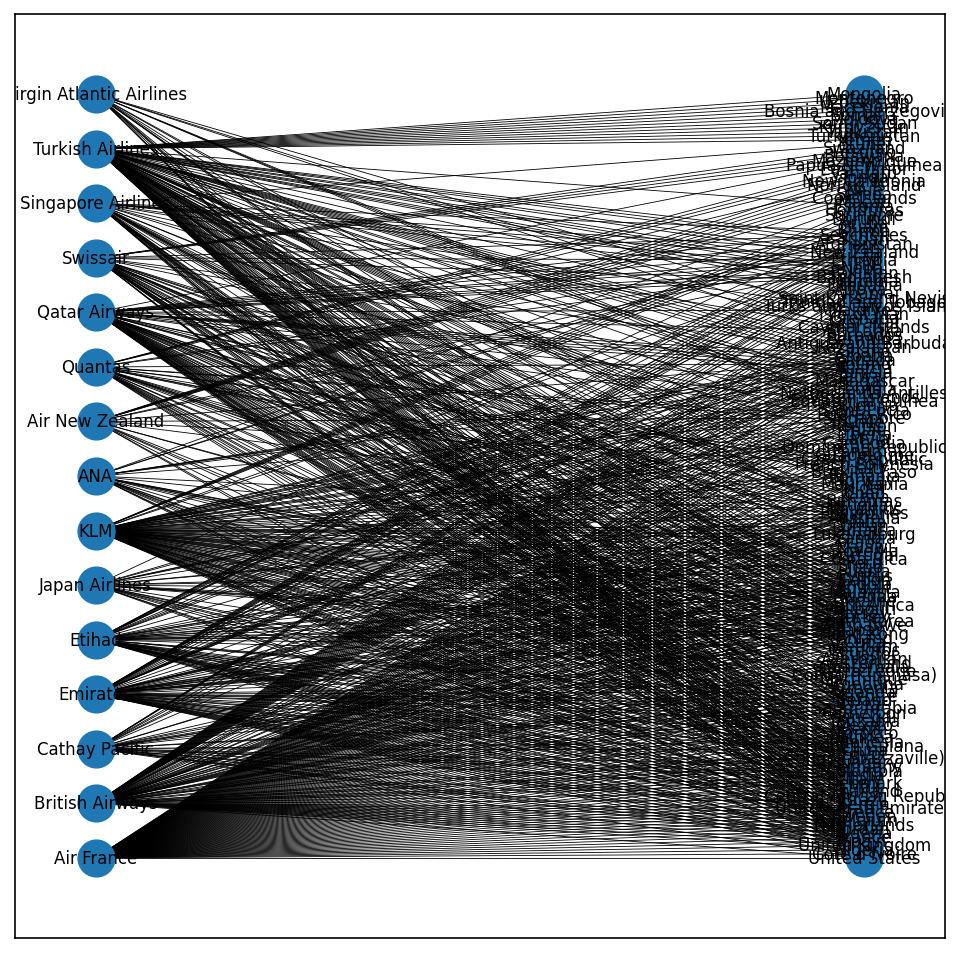

In [5]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Airline),font_size=8,width=0.4)

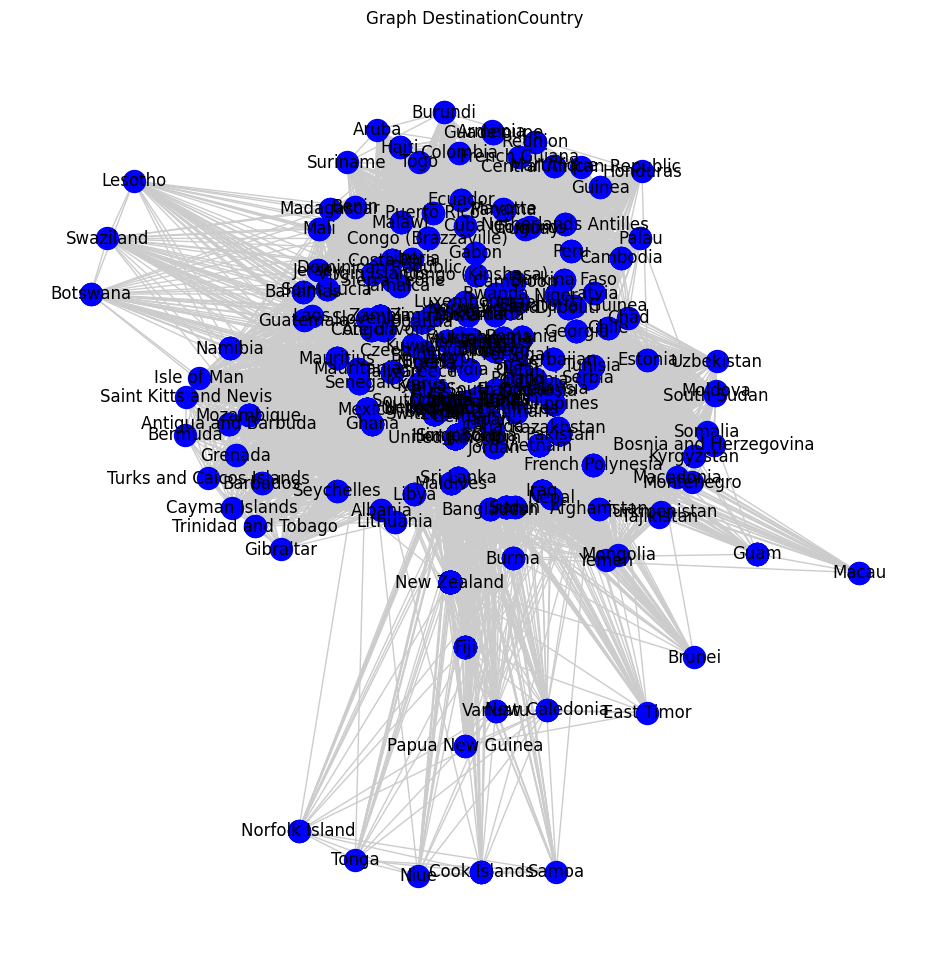

In [6]:
G = bipartite.weighted_projected_graph(B,list(set(DestinationCountry)))
plt.figure(figsize=(12,12))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G, layout,nodelist=DestinationCountry,node_size=250,node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(DestinationCountry, DestinationCountry))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')

plt.title("Graph DestinationCountry")

plt.show()

In [7]:
labels = nx.get_edge_attributes(G, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
    df2.to_csv (r'gelphi.csv', index = False, header=True)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
<ipython-input-7-19db72e5b984>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
<ipython-input-7-19db72e5b984>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
<ipython-input-7-19db72e5b984>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
<ipython-input-7-19db72e5b984>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2

In [9]:
df = pd.read_csv('gelphi.csv', usecols=['source', 'target'])
df.dropna()
df.drop_duplicates()
df

,source,target
0,Canada,Japan
1,Canada,Macau
2,Canada,New Caledonia
3,Canada,Iran
4,Canada,Yemen
...,...,...
12255,Niger,Dominican Republic
12256,Niger,Uzbekistan
12257,Niger,Belgium
12258,Dominican Republic,Belgium


In [10]:
G = nx.Graph()

edges = df[['source', 'target']]
G = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh của đồ thị là', len(G.nodes()))
print('Số cạnh của đồ thị là', len(G.edges()))

Số đỉnh của đồ thị là 185
Số cạnh của đồ thị là 12260


In [11]:
print('Kiểm tra đồ thị liên thông: ')
nx.is_connected(G)

Kiểm tra đồ thị liên thông: 


True

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


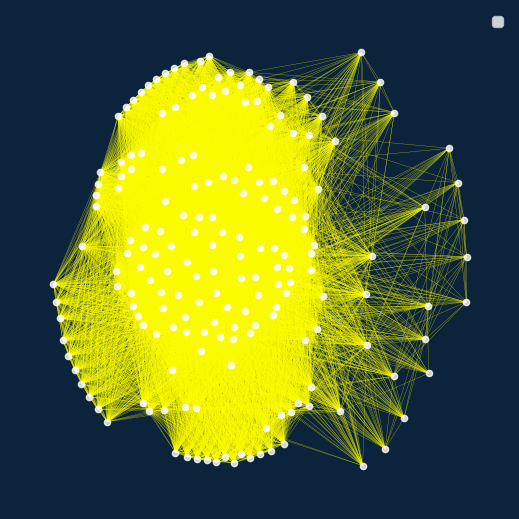

In [12]:
# %load_ext autotime
# nx.draw_networkx(G)

pd.option_context('precision', 10)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.kamada_kawai_layout(G)

cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (5,5), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 20, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

#GEOMETRIC MEASURES

In [13]:
nx.average_shortest_path_length(G)

1.2796709753231492

In [14]:
# average degree

average_degree = sum([len(list(G.neighbors(n))) for n in G.nodes()]) / len(G.nodes())

print('Average degree: ', average_degree)

Average degree:  132.54054054054055


In [15]:
#degree of each node
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

degree_dict = { node: 0 for node in G.nodes() }

for node in G.nodes():
  degree_dict[node] = len(list(G.neighbors(node)))

degree_df = print_table(degree_dict.items(), ['Node', 'Degree'])

degree_df

,Node,Degree
0,Canada,178
1,Japan,181
2,Macau,25
3,New Caledonia,41
4,Iran,115
...,...,...
180,Brunei,37
181,East Timor,34
182,Lesotho,40
183,Swaziland,40


# Closeness Centrality


In [16]:
# reverse (bool, optional (default=False)) – If True and G is a digraph, reverse the edges of G, using successors instead of predecessors.
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
closeness_centrality_df = print_table(closeness_centrality.items(), ['Node', 'Closeness centrality'])

closeness_centrality_df

,Node,Closeness centrality
0,Canada,0.968421
1,Japan,0.983957
2,Macau,0.536443
3,New Caledonia,0.562691
4,Iran,0.727273
...,...,...
180,Brunei,0.555891
181,East Timor,0.550898
182,Lesotho,0.560976
183,Swaziland,0.560976


Biểu đồ thể hiện giá trị closeness centrality của các node trong graph


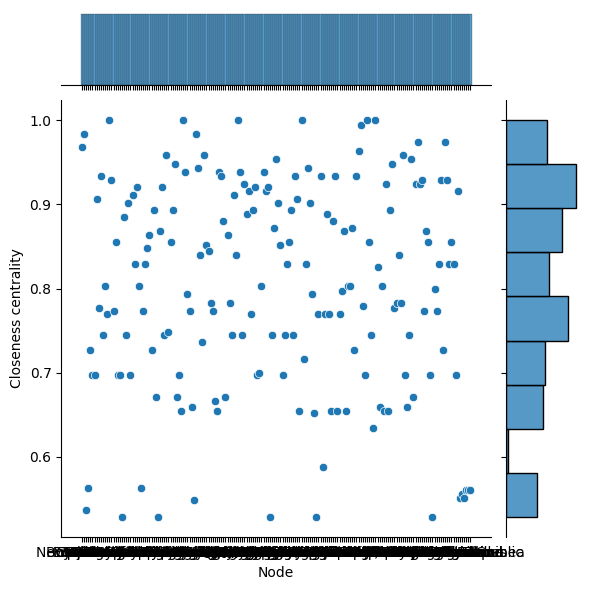

In [17]:
print(colored("Biểu đồ thể hiện giá trị closeness centrality của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Closeness centrality", data=closeness_centrality_df)

Biểu đồ thể hiện phân bố closeness centrality của các node trong graph


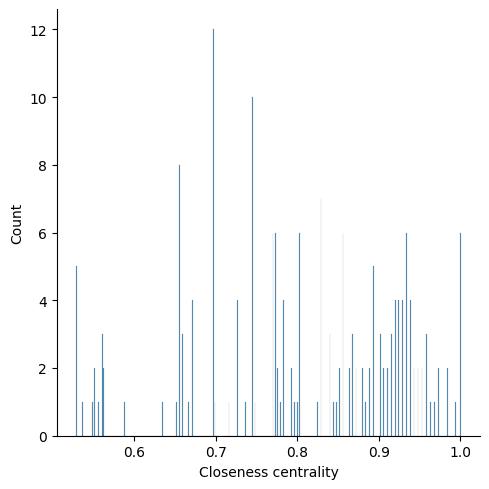

In [18]:
print(colored("Biểu đồ thể hiện phân bố closeness centrality của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Closeness centrality", data=closeness_centrality_df, binwidth=0.001)

In [19]:
top_ten_max_closeness_cen = sorted_closeness_centrality[:10]
print('Top 10 quốc gia có Closeness centrality cao nhất: ')
print_table(top_ten_max_closeness_cen, ['Counrty', 'Closeness centrality'])

Top 10 quốc gia có Closeness centrality cao nhất: 


,Counrty,Closeness centrality
0,Singapore,1.000000
1,Hong Kong,1.000000
2,United Kingdom,1.000000
3,United States,1.000000
4,United Arab Emirates,1.000000
5,Germany,1.000000
6,Australia,0.994595
7,Japan,0.983957
8,China,0.983957
9,Switzerland,0.973545


In [20]:
top_ten_min_closeness_cen = sorted_closeness_centrality[-10:]
print('Top 10 quốc gia có Closeness centrality nhỏ nhất: ')
print_table(top_ten_min_closeness_cen, ['Counrty', 'Closeness centrality'])

Top 10 quốc gia có Closeness centrality nhỏ nhất: 


,Counrty,Closeness centrality
0,Brunei,0.555891
1,Papua New Guinea,0.550898
2,East Timor,0.550898
3,Guam,0.549254
4,Macau,0.536443
5,Cook Islands,0.528736
6,Niue,0.528736
7,Norfolk Island,0.528736
8,Samoa,0.528736
9,Tonga,0.528736
